# Textblob Sentiment Analysis on R. Goldblatt Short Stories

In [1]:
import textblob
import pandas as pd
import numpy as np
from textblob.tokenizers import WordTokenizer, SentenceTokenizer

In [2]:
abbrev = ['CC','CD','DT','EX','FW','IN','JJ','JJR','JJS','LS','MD','NN','NNS','NNP','NNPS','PDT','POS','PRP','PRP$','RB','RBR','RBS','RP','SYM','TO','UH','VB','VBD','VBG','VBN','VBP','VBZ','WDT','WP','WP$','WRB']
definition = ['Coordinating conjunction','Cardinal number','Determiner','Existential there','Foreign word','Preposition or subordinating conjunction','Adjective','Adjective, comparative','Adjective, superlative','List item marker','Modal','Noun, singular or mass','Noun, plural','Proper noun, singular','Proper noun, plural','Predeterminer','Possessive ending','Personal pronoun','Possessive pronoun','Adverb','Adverb, comparative','Adverb, superlative','Particle','Symbol','to','Interjection','Verb, base form','Verb, past tense','Verb, gerund or present participle','Verb, past participle','Verb, non-3rd person singular present','Verb, 3rd person singular present','Wh-determiner','Wh-pronoun','Possessive wh-pronoun','Wh-adverb']

ppos = pd.DataFrame({
    'abbrev': abbrev,
    'definition': definition
})

In [3]:
def story_analysis(file, word_info_output, sentence_output, noun_phrase_output):
    '''
    story_analysis uses textblob to run basic nlp sentiment analysis on a text file. The
    function returns 3 pandas dataframes containing some basic nlp information on the
    story, broken up by word and sentence. The third dataframe is a list of the noun 
    phrases that occur in the story.
    
    It takes in:
        -a file object: pass a string containing the filename and location
        -an empty dataframe to build the word_info_output table in
        -an empty dataframe to build the sentence_output table in
        -an empty dataframe to build the noun_phrase_output table in
    '''
    wt = WordTokenizer()
    st = SentenceTokenizer()

    with open(file, 'r') as myfile:
        story = myfile.read().replace('\n', ' ')
    
    pos = list()
    np = list()
    word = list()
    part = list()
    polarity_w = list()
    subjectivity_w = list()
    sentences = list()
    sentences_tags = list()
    sentences_np = list()
    pos_sentence = list()
    polarity_s = list()
    subjectivity_s = list()

    story_blob = textblob.TextBlob(story, tokenizer=wt)
    pos.append(story_blob.tags)
    np.append(story_blob.noun_phrases)

    pos = [j for i in pos for j in i]
    np = [j for i in np for j in i]

    for p in pos:
        word.append(p[0])
        part.append(p[1])
        word_blob = textblob.TextBlob(p[0])
        polarity_w.append(word_blob.sentiment.polarity)
        subjectivity_w.append(word_blob.sentiment.subjectivity)
        
    word_info_output = pd.DataFrame(
    {'word': word,
     'part': part,
     'polarity': polarity_w,
     'subjectivity':subjectivity_w
    })

    noun_phrase_output = pd.DataFrame({
        'noun_phrase':np
    })
    
    word_info_output = word_info_output.merge(ppos,how='left',left_on='part',right_on='abbrev')
    word_info_output = word_info_output.drop(columns='abbrev')
   
    all_sentences = story_blob.sentences

    for sentence in all_sentences:
        sentences.append(str(sentence))
        sentences_blob = textblob.TextBlob(str(sentence))
        polarity_s.append(sentences_blob.sentiment.polarity)
        subjectivity_s.append(sentences_blob.sentiment.subjectivity)
        sentences_tags.append(sentences_blob.tags),
        sentences_np.append(sentences_blob.noun_phrases)

    for i in sentences_tags:
        temp_sentence = ''
        for j in range(len(i)):
            temp_sentence += i[j][1] + ' '
        pos_sentence.append(temp_sentence.strip())

    sentence_output = pd.DataFrame({
        'sentences': sentences,
        'polarity': polarity_s,
        'subjectivity': subjectivity_s,
        'pos_sentence': pos_sentence
    })

    return (word_info_output,sentence_output,noun_phrase_output)
    

## SRVR Text Analysis

In [4]:
srvr_word_info, srvr_sentence, srvr_noun_phrase = story_analysis('Final Portfolio.txt', 
                                                                 pd.DataFrame(), pd.DataFrame(), pd.DataFrame())

### SRVR Word and Sentence Info Breakdown

In [5]:
srvr_word_info.head(10)

,word,part,polarity,subjectivity,definition
0,Things,NNS,0.0,0.0,"Noun, plural"
1,had,VBD,0.0,0.0,"Verb, past tense"
2,started,VBN,0.0,0.0,"Verb, past participle"
3,out,RP,0.0,0.0,Particle
4,so,RB,0.0,0.0,Adverb
5,well,RB,0.0,0.0,Adverb
6,Is,VBZ,0.0,0.0,"Verb, 3rd person singular present"
7,n't,RB,0.0,0.0,Adverb
8,that,IN,0.0,0.0,Preposition or subordinating conjunction
9,how,WRB,0.0,0.0,Wh-adverb


In [6]:
srvr_sentence.head(10)

,sentences,polarity,subjectivity,pos_sentence
0,Things had started out so well.,0.000000,0.000000,NNS VBD VBN RP RB RB
1,"Isn't that how they always start, though?",0.000000,0.000000,VBZ RB IN WRB PRP RB VBP RB
2,"It was ironic really, how quickly things could...",0.246667,0.560000,PRP VBD JJ RB WRB RB NNS MD VB JJ RB WRB NN VB...
3,The irony was not lost on Dr. Marigold Roberts...,-0.300000,0.400000,DT NN VBD RB VBN IN NNP NNP NNP IN DT NN IN PR...
4,"Normally, she would stress over the fact that ...",-0.283333,0.716667,RB PRP MD VB IN DT NN IN PRP VBD VBG RB VBN CC...
5,"He was coming for her, and she had no time to ...",-0.200000,0.000000,PRP VBD VBG IN PRP$ CC PRP VBD DT NN TO NN
6,"He, SRVR-2K16, was her greatest triumph.",1.000000,1.000000,PRP NNP VBD PRP$ JJS NN
7,He was a breakthrough in the science of robotics.,0.000000,0.000000,PRP VBD DT NN IN DT NN IN NNS
8,The world's first fully functioning artificial...,-0.116667,0.477778,DT NN POS JJ RB VBG JJ NN VBN IN DT NN WDT VBD...
9,"So remarkable, in fact, that he was able to fo...",0.416667,0.491667,RB JJ IN NN IN PRP VBD JJ TO VB DT IN PRP$ NNS...


In [7]:
srvr_noun_phrase.head(10)

,noun_phrase
0,marigold roberts
1,normally
2,srvr-2k16
3,world 's
4,artificial intelligence
5,human species
6,medical program
7,initial function
8,sensitive sensors
9,srvr-2k16


### SRVR Sentence and Word Sentiment Change Over Story

In [8]:
srvr_sentence.plot(y='polarity', use_index=True)

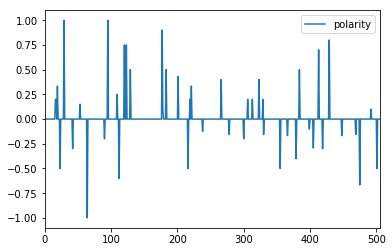

In [9]:
srvr_word_info.plot(y='polarity', use_index=True)

## The Job Text Analysis

In [10]:
the_job_word_info, the_job_sentence, the_job_noun_phrase = story_analysis('the_job.txt', 
                                                                          pd.DataFrame(), pd.DataFrame(), pd.DataFrame())

### The Job Word and Sentence Info Breakdown

In [11]:
the_job_word_info.head(10)

,word,part,polarity,subjectivity,definition
0,I,PRP,0.000000,0.000000,Personal pronoun
1,stared,VBD,0.000000,0.000000,"Verb, past tense"
2,down,RB,-0.155556,0.288889,Adverb
3,at,IN,0.000000,0.000000,Preposition or subordinating conjunction
4,the,DT,0.000000,0.000000,Determiner
5,card,NN,0.000000,0.000000,"Noun, singular or mass"
6,in,IN,0.000000,0.000000,Preposition or subordinating conjunction
7,my,PRP$,0.000000,0.000000,Possessive pronoun
8,lap,NN,0.000000,0.000000,"Noun, singular or mass"
9,On,IN,0.000000,0.000000,Preposition or subordinating conjunction


In [12]:
the_job_sentence.head(10)

,sentences,polarity,subjectivity,pos_sentence
0,I stared down at the card in my lap.,-0.155556,0.288889,PRP VBD RB IN DT NN IN PRP$ NN
1,"On the card in neat, block handwriting was a n...",0.000000,0.000000,IN DT NN IN NN NN NN VBD DT NN VBN IN JJ NNS
2,A phone number.,0.000000,0.000000,DT NN NN
3,One I wasn’t sure I should call.,0.500000,0.888889,CD PRP VBP JJ JJ JJ PRP MD VB
4,"When the card was first handed to me, my immed...",0.250000,0.333333,WRB DT NN VBD RB VBN TO PRP PRP$ JJ NN VBD TO ...
5,"After all, the person who gave me the card was...",0.375000,0.625000,IN DT DT NN WP VBD PRP DT NN NN NNP VBZ RB IN ...
6,"It belonged to Miles Quinn, a former boyfriend...",0.000000,0.000000,PRP VBD TO NNP NNP DT JJ NN IN NN IN PRP VBP J...
7,"The last I had seen him, he was walking away a...",0.000000,0.066667,DT JJ PRP VBD VBN PRP PRP VBD VBG RB IN VBG RP...
8,Our breaks usually didn’t lasted long.,-0.150000,0.325000,PRP$ NNS RB VBP JJ NN VBD RB
9,We were always drawn back together by the fami...,0.050000,0.100000,PRP VBD RB VBN RP RB IN DT NN CC NN IN DT JJ NN


In [13]:
the_job_noun_phrase.head(10)

,noun_phrase
0,block handwriting
1,phone number
2,wasn ’ t
3,immediate reaction
4,card wasn ’ t
5,all-time favorite people
6,miles quinn
7,haven ’ t
8,nth time
9,didn ’ t


### The Job Sentence and Word Sentiment Change Over Story

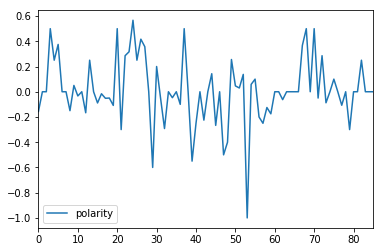

In [14]:
the_job_sentence.plot(y='polarity', use_index=True)

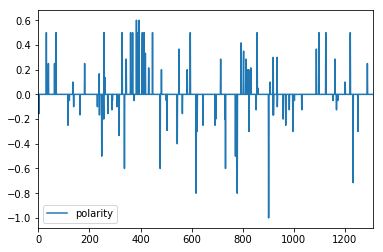

In [15]:
the_job_word_info.plot(y='polarity', use_index=True)

## After Life Text Analysis

In [16]:
after_life_word_info, after_life_sentence, after_life_noun_phrase = story_analysis('after_life.txt', 
                                                                                   pd.DataFrame(), pd.DataFrame(), pd.DataFrame())

### After Life Word and Sentence Info Breakdown

In [17]:
after_life_word_info.head(10)

,word,part,polarity,subjectivity,definition
0,Death,NN,0.0,0.0,"Noun, singular or mass"
1,looked,VBD,0.0,0.0,"Verb, past tense"
2,through,IN,0.0,0.0,Preposition or subordinating conjunction
3,the,DT,0.0,0.0,Determiner
4,eye,NN,0.0,0.0,"Noun, singular or mass"
5,sockets,NNS,0.0,0.0,"Noun, plural"
6,in,IN,0.0,0.0,Preposition or subordinating conjunction
7,his,PRP$,0.0,0.0,Possessive pronoun
8,skull,NN,0.0,0.0,"Noun, singular or mass"
9,at,IN,0.0,0.0,Preposition or subordinating conjunction


In [18]:
after_life_sentence.head(10)

,sentences,polarity,subjectivity,pos_sentence
0,Death looked through the eye sockets in his sk...,0.000000,0.000000,NN VBD IN DT NN NNS IN PRP$ NN IN DT NN IN NN ...
1,What had once been a fine adventurer was now o...,0.105556,0.600000,WP VBD RB VBN DT JJ NN VBD RB RB DT NN RB JJ C...
2,"His hair was shaggy, and it looked like he had...",0.000000,0.000000,PRP$ NN VBD JJ CC PRP VBD IN PRP VBZ JJ NNS VB...
3,"Death could not see any wounds, so hopefully h...",-0.650000,0.950000,NNP MD RB VB DT NNS RB RB PRP$ NN VBD RB VBN R...
4,The former adventurer stood sheepishly in fron...,0.000000,0.000000,DT JJ NN VBD RB IN NN IN NNP IN DT NN IN TO VB...
5,"“You’re early, Reckless,” said Death in surprise.",0.100000,0.300000,NN PRP VBP VB JJ NNP NNP VBD NNP IN NN
6,"“Yeah,” Reckless said, rubbing the back of his...",0.000000,0.333333,NN UH JJ NNP VBD VBG DT NN IN PRP$ NN IN PRP$ ...
7,The spirit straightened and took in a deep bre...,0.000000,0.400000,DT NN VBD CC VBD IN DT JJ NN
8,"“I want another chance at life.” “No,” Death a...",-0.025000,0.125000,NN PRP VBP DT NN IN JJ NNP NNP NNP NNP NNP VBD RB
9,"“Hear me out,” the former adventurer begged.",0.000000,0.000000,NN NNP PRP RP VBZ DT JJ NN VBD


In [19]:
after_life_noun_phrase.head(10)

,noun_phrase
0,death
1,eye sockets
2,fine adventurer
3,leather armor
4,hadn ’ t
5,death
6,death
7,’ re
8,reckless
9,death


### After Life Sentence and Word Sentiment Change Over Story

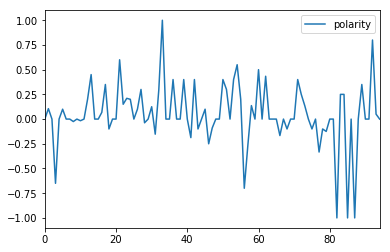

In [20]:
after_life_sentence.plot(y='polarity', use_index=True)

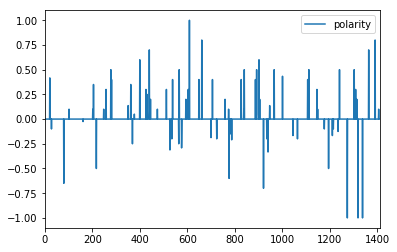

In [21]:
after_life_word_info.plot(y='polarity', use_index=True)

## Yellow Red Gray Text Analysis

In [22]:
yrg_word_info, yrg_sentence, yrg_noun_phrase = story_analysis('yellow_red_gray.txt', 
                                                              pd.DataFrame(), pd.DataFrame(), pd.DataFrame())

### Yellow Red Gray Word and Sentence Info Breakdown

In [23]:
yrg_word_info.head(10)

,word,part,polarity,subjectivity,definition
0,Water,NNP,0.000000,0.000000,"Proper noun, singular"
1,fell,VBD,0.000000,0.000000,"Verb, past tense"
2,down,RB,-0.155556,0.288889,Adverb
3,on,IN,0.000000,0.000000,Preposition or subordinating conjunction
4,the,DT,0.000000,0.000000,Determiner
5,city,NN,0.000000,0.000000,"Noun, singular or mass"
6,in,IN,0.000000,0.000000,Preposition or subordinating conjunction
7,a,DT,0.000000,0.000000,Determiner
8,drizzle,NN,0.000000,0.000000,"Noun, singular or mass"
9,Merciful,NNP,0.000000,0.000000,"Proper noun, singular"


In [24]:
yrg_sentence.head(10)

,sentences,polarity,subjectivity,pos_sentence
0,Water fell down on the city in a drizzle.,-0.155556,0.288889,NNP VBD RB IN DT NN IN DT NN
1,"Merciful enough to not be fully rain, but stil...",-0.025000,0.625000,NNP RB TO RB VB RB JJ CC RB JJ RB IN JJS NNS V...
2,"A bright yellow cab, a stark contrast to the g...",0.068889,0.347778,DT JJ JJ NN DT JJ NN TO DT JJ NN IN VBD RB DT ...
3,"Even so, the driver drove carefully, wary of t...",-0.300000,0.550000,RB RB DT NN VBD RB NN IN DT JJ NN CC JJ NNS
4,"The inside of the cab was relatively quiet, th...",0.033333,0.511111,DT NN IN DT NN VBD RB JJ DT JJ NN VBG IN DT JJ...
5,"There were only two people inside: the driver,...",-0.200000,0.925000,EX VBD RB CD NNS IN DT NN DT JJ NN IN DT JJ NN...
6,"The driver was smoking, permeating the already...",0.000000,0.000000,DT NN VBD VBG VBG DT JJ NN IN DT NN IN DT NN N...
7,"The passenger coughed every now and again, too...",0.000000,0.125000,DT NN VBD DT RB CC RB RB JJ TO VB DT NN TO VB ...
8,"With a final puff, the driver plucked the spen...",-0.125000,0.612500,IN DT JJ NN DT NN VBD DT JJ NN IN PRP$ NN IN P...
9,"The thin man in the backseat sighed, both in r...",-0.025000,0.750000,DT JJ NN IN DT NN VBD DT IN NN IN DT NN VBD VB...


In [25]:
yrg_noun_phrase.head(10)

,noun_phrase
0,merciful
1,bright yellow cab
2,stark contrast
3,gray world
4,wet pavement
5,old radio
6,fat man
7,greasy t-shirt
8,thin man
9,final puff


### Yellow Red Gray Sentence and Word Sentiment Change Over Story

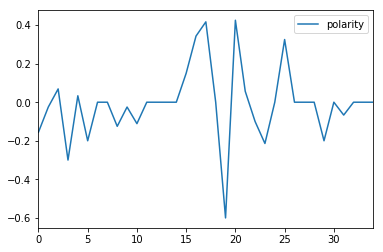

In [26]:
yrg_sentence.plot(y='polarity', use_index=True)

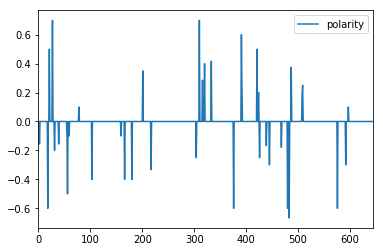

In [27]:
yrg_word_info.plot(y='polarity', use_index=True)

## Moon Text Analysis

In [28]:
moon_word_info, moon_sentence, moon_noun_phrase = story_analysis('moon.txt', 
                                                                 pd.DataFrame(), pd.DataFrame(), pd.DataFrame())

### Moon Word and Sentence Info Breakdown

In [29]:
moon_word_info.head(10)

,word,part,polarity,subjectivity,definition
0,Grey,NNP,-0.05,0.1,"Proper noun, singular"
1,was,VBD,0.00,0.0,"Verb, past tense"
2,the,DT,0.00,0.0,Determiner
3,only,JJ,0.00,1.0,Adjective
4,color,NN,0.00,0.0,"Noun, singular or mass"
5,Marco,NNP,0.00,0.0,"Proper noun, singular"
6,had,VBD,0.00,0.0,"Verb, past tense"
7,seen,VBN,0.00,0.0,"Verb, past participle"
8,in,IN,0.00,0.0,Preposition or subordinating conjunction
9,a,DT,0.00,0.0,Determiner


In [30]:
moon_sentence.head(10)

,sentences,polarity,subjectivity,pos_sentence
0,Grey was the only color Marco had seen in a lo...,-0.033333,0.500000,NNP VBD DT JJ NN NNP VBD VBN IN DT JJ NN
1,"Everything around him, the landscape, the Hut,...",-0.050000,0.100000,VBG IN PRP DT NN DT NNP CC RB DT NN VBD PDT DT...
2,"There was color, yes, in the flag on his right...",-0.004762,0.295238,EX VBD NN UH IN DT NN IN PRP$ JJ NN CC DT NN I...
3,"Grey, and the blackness of space, clearly visi...",0.016667,0.194444,NNP CC DT NN IN NN RB JJ IN DT NN TO VB PRP$ N...
4,"For six months he had been alone, with nothing...",0.000000,0.100000,IN CD NNS PRP VBD VBN RB IN NN CC DT NN NNS CC...
5,While he’d had the incoming messages from NASA...,0.000000,0.100000,IN PRP VBZ NN VBD DT JJ NNS IN NNP RB DT NN IN...
6,"Just the rocks and space dust, with occasional...",-0.025000,0.162500,RB DT NNS CC NN NN IN JJ JJ NNS IN DT NNP CC D...
7,Everything had been going smoothly at first.,0.250000,0.333333,NN VBD VBN VBG RB IN JJ
8,"He and his partner, Clarke, had landed on the ...",0.000000,0.000000,PRP CC PRP$ NN NNP VBD VBN IN DT NN IN DT NN R...
9,The plan had been for the two of them to set u...,-0.200000,0.425000,DT NN VBD VBN IN DT CD IN PRP TO VB RP NN VB N...


In [31]:
moon_noun_phrase.head(10)

,noun_phrase
0,grey
1,marco
2,long time
3,hut
4,washed-out grey
5,right shoulder
6,hut
7,grey
8,earth
9,’ d


### Moon Sentence and Word Sentiment Change Over Story

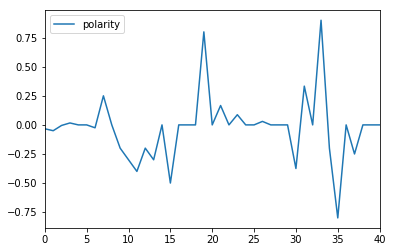

In [32]:
moon_sentence.plot(y='polarity', use_index=True)

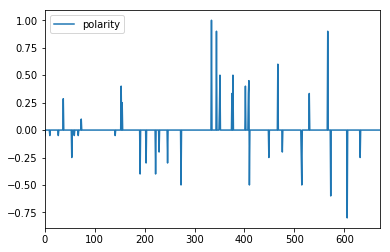

In [33]:
moon_word_info.plot(y='polarity', use_index=True)

## Mobster Text Analysis

In [34]:
mobster_word_info, mobster_sentence, mobster_noun_phrase = story_analysis('mobster.txt', 
                                                                          pd.DataFrame(), pd.DataFrame(), pd.DataFrame())

### Mobster Word and Sentence Info Breakdown

In [35]:
mobster_word_info.head(10)

,word,part,polarity,subjectivity,definition
0,By,IN,0.0,0.0,Preposition or subordinating conjunction
1,the,DT,0.0,0.0,Determiner
2,time,NN,0.0,0.0,"Noun, singular or mass"
3,children,NNS,0.0,0.0,"Noun, plural"
4,are,VBP,0.0,0.0,"Verb, non-3rd person singular present"
5,three,CD,0.0,0.0,Cardinal number
6,years,NNS,0.0,0.0,"Noun, plural"
7,old,JJ,0.1,0.2,Adjective
8,they,PRP,0.0,0.0,Personal pronoun
9,have,VBP,0.0,0.0,"Verb, non-3rd person singular present"


In [36]:
mobster_sentence.head(10)

,sentences,polarity,subjectivity,pos_sentence
0,"By the time children are three years old, they...",0.300000,0.350000,IN DT NN NNS VBP CD NNS JJ PRP VBP VBN DT NN I...
1,It’s at this point they are able to string tog...,0.250000,0.508333,PRP VBZ NN IN DT NN PRP VBP JJ TO VBG RB JJ NN...
2,"That being known, Ted has no idea what his thr...",0.000000,0.000000,DT VBG VBN NNP VBZ DT NN WP PRP$ JJ NN NNS WRB...
3,"“Don’t you mean monster, sweetheart?” He asks ...",-0.006250,0.393750,JJ NNP NNP NN PRP VBP RB VB IN PRP VBZ IN DT N...
4,"“Mobster,” she insists.",0.000000,0.000000,JJ NNP NNP PRP VBZ
5,He wanders into the living room to tell his wi...,0.100000,0.300000,PRP VBZ IN DT NN NN TO VB PRP$ NN WP VBZ RB JJ...
6,"“That’s nice, dear,” she says, twirling a piec...",0.192857,0.750000,NN DT VBZ JJ JJ JJ NNP PRP VBZ VBG DT NN IN JJ...
7,"“While you’re up, can you get me some water?” ...",-0.155556,0.288889,NN IN PRP VBP VB RP MD PRP VB PRP DT NN RB NNP...
8,"Outside the door, he can hear her talking to h...",0.000000,0.050000,IN DT NN PRP MD VB PRP$ VBG TO VB IN DT JJ NN
9,Though he’s pretty sure the voice responding c...,0.375000,0.944444,IN PRP VBZ JJ RB JJ DT NN VBG NN NNP NN VB NNS


In [37]:
mobster_noun_phrase.head(10)

,noun_phrase
0,time children
1,’ s
2,small sentences
3,ted
4,three-year-old daughter
5,don
6,’ t
7,patient smile
8,mobster
9,busy reading


### Mobster Sentence and Word Sentiment Change Over Story

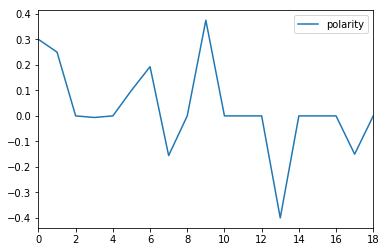

In [38]:
mobster_sentence.plot(y='polarity', use_index=True)

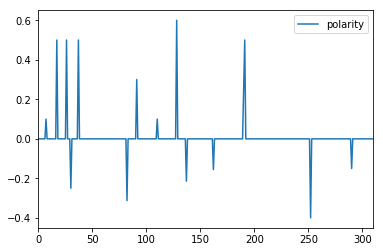

In [39]:
mobster_word_info.plot(y='polarity', use_index=True)

## Memoir Text Analysis

In [40]:
memoir_word_info, memoir_sentence, memoir_noun_phrase = story_analysis('memoir.txt', 
                                                                       pd.DataFrame(), pd.DataFrame(), pd.DataFrame())

### Memoir Word and Sentence Info Breakdown

In [41]:
memoir_word_info.head(10)

,word,part,polarity,subjectivity,definition
0,Summers,NNS,0.0,0.0,"Noun, plural"
1,in,IN,0.0,0.0,Preposition or subordinating conjunction
2,Spruce,NNP,0.0,0.0,"Proper noun, singular"
3,Pine,NNP,0.0,0.0,"Proper noun, singular"
4,North,NNP,0.0,0.0,"Proper noun, singular"
5,Carolina,NNP,0.0,0.0,"Proper noun, singular"
6,were,VBD,0.0,0.0,"Verb, past tense"
7,characterized,VBN,0.0,0.0,"Verb, past participle"
8,by,IN,0.0,0.0,Preposition or subordinating conjunction
9,a,DT,0.0,0.0,Determiner


In [42]:
memoir_sentence.head(10)

,sentences,polarity,subjectivity,pos_sentence
0,"Summers in Spruce Pine, North Carolina were ch...",-0.200000,0.505556,NNS IN NNP NNP NNP NNP VBD VBN IN DT NN NN IN ...
1,Even ditzy kids like me knew better than to pl...,0.500000,0.500000,RB JJ NNS IN PRP VBD JJR IN TO VB NNS IN DT NN
2,"Instead, I would play in the late afternoon an...",-0.100000,0.450000,RB PRP MD VB IN DT JJ NN CC JJ NN WRB DT IN DT...
3,"The evening, though, brought bloodsucking mosq...",0.000000,0.000000,DT NN RB VBD VBG NN WDT VBD JJ JJ NN IN PRP$ N...
4,"More often than not, I was joined by my younge...",0.250000,0.250000,RBR RB IN RB PRP VBD VBN IN PRP$ JJR NN NNP IN...
5,"We would chase each other out the front door, ...",-0.062500,0.187500,PRP MD VB DT JJ IN DT JJ NN VBG NN WRB NNP VBD...
6,"Into the yard we ran, yelling instructions to ...",-0.400000,0.400000,IN DT NN PRP VBD VBG NNS TO VB NN PRP MD VB DT NN
7,"Sometimes, we would play with a tennis ball an...",0.000000,0.000000,RB PRP MD VB IN DT NN NN CC NN IN DT JJ NN IN ...
8,Other times we were the clumsy servants to an ...,0.191667,0.591667,JJ NNS PRP VBD DT JJ NNS TO DT JJ NN VBG PRP$ ...
9,"On rare occasions, Mom would connect the garde...",0.300000,0.900000,IN JJ NNS NNP MD VB DT NN NN TO VB NNS CC VB P...


In [43]:
memoir_noun_phrase.head(10)

,noun_phrase
0,summers
1,spruce pine
2,carolina
3,muggy heat
4,ditzy kids
5,late afternoon
6,early evening
7,red bumps
8,david
9,outdoor playtimes


### Memoir Sentence and Word Sentiment Change Over Story

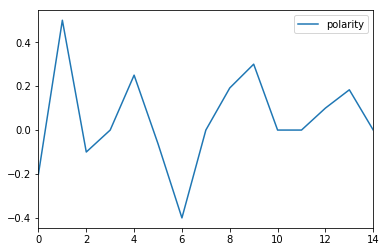

In [44]:
memoir_sentence.plot(y='polarity', use_index=True)

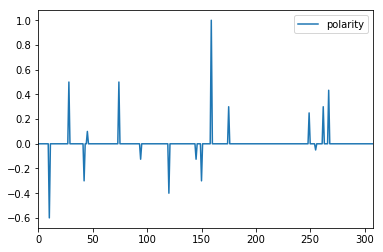

In [45]:
memoir_word_info.plot(y='polarity', use_index=True)

In [46]:
#Read in google books to match patterns, then analyze to match on tone and predict to see if this is 
#something she would have written

# Topic Modeling using LDA
*not sure what is going on......*

In [47]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models

from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

import nltk
nltk.download('wordnet')

import itertools

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/homeworkdude/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [48]:
def preprocess(text):
    def lemmatize_stemming(text):
        stemmer=SnowballStemmer('english')
        return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
    
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [49]:
with open('Final Portfolio.txt', 'r') as myfile:
    srvr = myfile.read().replace('\n', ' ')
    
with open('the_job.txt', 'r') as myfile:
    the_job = myfile.read().replace('\n', ' ')
    
with open('after_life.txt', 'r') as myfile:
    after_life = myfile.read().replace('\n', ' ')
    
with open('yellow_red_gray.txt', 'r') as myfile:
    yrg = myfile.read().replace('\n', ' ')
    
with open('moon.txt', 'r') as myfile:
    moon = myfile.read().replace('\n', ' ')
    
with open('mobster.txt', 'r') as myfile:
    mobster = myfile.read().replace('\n', ' ')
    
with open('memoir.txt', 'r') as myfile:
    memoir = myfile.read().replace('\n', ' ')

In [50]:
stories_train = pd.DataFrame({
    'story': [srvr, the_job, after_life, yrg, moon]
})

stories_test = pd.DataFrame({
    'story': [mobster, memoir]
})

In [51]:
processed_stories = stories_train['story'].map(preprocess)

In [52]:
dictionary = gensim.corpora.Dictionary(processed_stories)

In [53]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abl
1 advantag
2 anomali
3 artifici
4 bang
5 begin
6 best
7 black
8 blood
9 bodi
10 break


In [54]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_stories]

In [55]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [56]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=3, 
                                       id2word=dictionary, passes=2, workers=2)

In [57]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} Words: {}'.format(idx, topic))
    print()

Topic: 0 Words: 0.012*"quinn" + 0.010*"say" + 0.009*"know" + 0.008*"like" + 0.008*"time" + 0.007*"wasn" + 0.007*"card" + 0.006*"hand" + 0.006*"give" + 0.006*"long"

Topic: 1 Words: 0.010*"joseph" + 0.009*"driver" + 0.006*"say" + 0.006*"month" + 0.006*"wish" + 0.005*"marco" + 0.005*"star" + 0.005*"like" + 0.005*"passeng" + 0.005*"woman"

Topic: 2 Words: 0.039*"reckless" + 0.016*"death" + 0.011*"gustaf" + 0.010*"look" + 0.008*"say" + 0.008*"drink" + 0.007*"hand" + 0.006*"adventur" + 0.006*"know" + 0.006*"like"



In [58]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=3, 
                                             id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))
    print()

Topic: 0 Word: 0.002*"joseph" + 0.002*"srvr" + 0.002*"driver" + 0.002*"robert" + 0.002*"doctor" + 0.002*"woman" + 0.002*"passeng" + 0.002*"window" + 0.002*"smoke" + 0.001*"open"

Topic: 1 Word: 0.003*"reckless" + 0.003*"quinn" + 0.002*"marco" + 0.002*"card" + 0.002*"nasa" + 0.002*"shuttl" + 0.002*"gustaf" + 0.002*"death" + 0.002*"month" + 0.002*"give"

Topic: 2 Word: 0.001*"driver" + 0.001*"joseph" + 0.001*"quinn" + 0.001*"reckless" + 0.001*"srvr" + 0.001*"window" + 0.001*"passeng" + 0.001*"card" + 0.001*"woman" + 0.001*"marco"



In [59]:
for index, score in sorted(lda_model[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("Score: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 3)))

Score: 0.9964722394943237	 
Topic: 0.012*"quinn" + 0.010*"say" + 0.009*"know"


In [60]:
for index, score in sorted(lda_model_tfidf[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("Score: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 3)))

Score: 0.9962339401245117	 
Topic: 0.002*"joseph" + 0.002*"srvr" + 0.002*"driver"


In [61]:
bow_vector = dictionary.doc2bow(preprocess(stories_test.story[0]))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.45016664266586304	 Topic: 0.039*"reckless" + 0.016*"death" + 0.011*"gustaf" + 0.010*"look" + 0.008*"say"
Score: 0.37507134675979614	 Topic: 0.012*"quinn" + 0.010*"say" + 0.009*"know" + 0.008*"like" + 0.008*"time"
Score: 0.1747620552778244	 Topic: 0.010*"joseph" + 0.009*"driver" + 0.006*"say" + 0.006*"month" + 0.006*"wish"


In [62]:
bow_vector = dictionary.doc2bow(preprocess(stories_test.story[1]))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.41698306798934937	 Topic: 0.010*"joseph" + 0.009*"driver" + 0.006*"say" + 0.006*"month" + 0.006*"wish"
Score: 0.3615414798259735	 Topic: 0.039*"reckless" + 0.016*"death" + 0.011*"gustaf" + 0.010*"look" + 0.008*"say"
Score: 0.22147545218467712	 Topic: 0.012*"quinn" + 0.010*"say" + 0.009*"know" + 0.008*"like" + 0.008*"time"


# Topic Modeling using Spacy

Imports for this version of LDA

In [63]:
import spacy
spacy.load('en')
from spacy.lang.en import English
from nltk.corpus import wordnet as wn
from gensim import corpora
import pickle
import gensim
from nltk.stem.wordnet import WordNetLemmatizer
import pyLDAvis.gensim

Functions Defined in the Tutorial

In [64]:
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [65]:
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

In [66]:
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

In [67]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

Definition of import variables, and train and test sets for the model

In [68]:
parser = English()
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

stories_train['tokens'] = [prepare_text_for_lda(srvr), prepare_text_for_lda(the_job), 
                     prepare_text_for_lda(after_life), prepare_text_for_lda(yrg), 
                     prepare_text_for_lda(moon)]

stories_test['tokens'] = [prepare_text_for_lda(mobster), prepare_text_for_lda(memoir)]

dictionary = corpora.Dictionary(stories_train['tokens'])
corpus = [dictionary.doc2bow(text) for text in stories_train.tokens]

pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')
print(dictionary)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/homeworkdude/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dictionary(869 unique tokens: ['advantage', 'always', 'anomaly', 'artificial', 'begin']...)


Building the LDA model using gensim. Determined through previous exploration that there are 3 primary topics represented in the stories.

In [69]:
NUM_TOPICS = 3
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, 
                                           id2word=dictionary, passes=15)
ldamodel.save('model3.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.047*"reckless" + 0.020*"death" + 0.014*"gustaf" + 0.008*"could"')
(1, '0.014*"could" + 0.009*"would" + 0.009*"things" + 0.008*"though"')
(2, '0.016*"quinn" + 0.010*"joseph" + 0.009*"driver" + 0.006*"could"')


Prediction of Topic for the First Test Story

In [70]:
test_bow1 = dictionary.doc2bow(stories_test.tokens[0])
print(test_bow1)
print(ldamodel.get_document_topics(test_bow1))

[(5, 1), (16, 1), (78, 1), (79, 1), (83, 1), (125, 2), (130, 1), (132, 3), (144, 1), (163, 2), (167, 1), (196, 1), (248, 2), (294, 1), (317, 1), (373, 1), (382, 1), (385, 2), (387, 2), (407, 3), (411, 1), (453, 1), (491, 1), (524, 1), (526, 1), (537, 1), (543, 1), (568, 1), (574, 1), (576, 1), (585, 1), (606, 1), (645, 2), (650, 1), (720, 1)]
[(0, 0.40454495), (1, 0.17714944), (2, 0.4183056)]


Prediction of Topic for the Second Story

In [71]:
test_bow2 = dictionary.doc2bow(stories_test.tokens[1])
print(test_bow2)
print(ldamodel.get_document_topics(test_bow2))

[(29, 1), (79, 3), (116, 1), (125, 1), (128, 1), (141, 8), (163, 1), (181, 1), (194, 1), (207, 1), (316, 1), (325, 1), (382, 1), (386, 1), (411, 1), (424, 1), (432, 1), (480, 1), (493, 1), (517, 1), (524, 1), (567, 1), (601, 1), (616, 1), (645, 1), (692, 1), (733, 1), (753, 1), (784, 1), (840, 1)]
[(0, 0.21267559), (1, 0.21973878), (2, 0.56758565)]


Visualization of Topics and the words that make them up

In [72]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model3.gensim')

lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/Users/homeworkdude/anaconda3/envs/nlp/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
